# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [160]:
# pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file=pd.read_csv("../output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [131]:
#As a reference, how the output data looks like:
output_data_file.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [161]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [162]:
#Creating a dataframe with city names
df=pd.DataFrame({"City":cities})
df["Cloudiness"]=""
df["Country"]=""
df["Date"]=""
df["Humidity"]=""
df["Lat"]=""
df["Lng"]=""
df["Max Temp"]=""
df["Wind Speed"]=""
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,,,,,,,,
1,ishigaki,,,,,,,,
2,clyde river,,,,,,,,
3,port elizabeth,,,,,,,,
4,ushuaia,,,,,,,,


In [100]:
#Perform a weather check on each city using a series of successive API calls.
base_url="http://api.openweathermap.org/data/2.5/weather"
params={"appid":weather_api_key}
for index,row in df.iterrows():
    params["q"] = row['City']
    try:
        print(f"Retrieving Record {index}: {row['City']}.")
        response=requests.get(base_url,params=params).json()
    except:
        print("Missing field/result... skipping")


Retrieving Results for Index 0: chokwe.
Retrieving Results for Index 1: richards bay.
Retrieving Results for Index 2: rikitea.
Retrieving Results for Index 3: bar harbor.
Retrieving Results for Index 4: helena.
Retrieving Results for Index 5: lisakovsk.
Retrieving Results for Index 6: belushya guba.
Retrieving Results for Index 7: ushuaia.
Retrieving Results for Index 8: yumen.
Retrieving Results for Index 9: suatu.
Retrieving Results for Index 10: mana.
Retrieving Results for Index 11: busselton.
Retrieving Results for Index 12: morehead.
Retrieving Results for Index 13: lorengau.
Retrieving Results for Index 14: butaritari.
Retrieving Results for Index 15: souillac.
Retrieving Results for Index 16: vaini.
Retrieving Results for Index 17: atuona.
Retrieving Results for Index 18: talnakh.
Retrieving Results for Index 19: pakhtakoron.
Retrieving Results for Index 20: punta arenas.
Retrieving Results for Index 21: sabha.
Retrieving Results for Index 22: new norfolk.
Retrieving Results fo

Retrieving Results for Index 188: vaitupu.
Retrieving Results for Index 189: cherdyn.
Retrieving Results for Index 190: makakilo city.
Retrieving Results for Index 191: rocha.
Retrieving Results for Index 192: saldanha.
Retrieving Results for Index 193: victoria.
Retrieving Results for Index 194: ahipara.
Retrieving Results for Index 195: luwuk.
Retrieving Results for Index 196: amapa.
Retrieving Results for Index 197: nikolskoye.
Retrieving Results for Index 198: alakurtti.
Retrieving Results for Index 199: palmerston.
Retrieving Results for Index 200: bargal.
Retrieving Results for Index 201: bambous virieux.
Retrieving Results for Index 202: dalbandin.
Retrieving Results for Index 203: neryungri.
Retrieving Results for Index 204: mananjary.
Retrieving Results for Index 205: bonthe.
Retrieving Results for Index 206: krasnoselkup.
Retrieving Results for Index 207: upernavik.
Retrieving Results for Index 208: dikson.
Retrieving Results for Index 209: teguise.
Retrieving Results for Ind

Retrieving Results for Index 375: port elizabeth.
Retrieving Results for Index 376: deputatskiy.
Retrieving Results for Index 377: san ramon de la nueva oran.
Retrieving Results for Index 378: samusu.
Retrieving Results for Index 379: aswan.
Retrieving Results for Index 380: yatou.
Retrieving Results for Index 381: katsuura.
Retrieving Results for Index 382: fairview.
Retrieving Results for Index 383: airai.
Retrieving Results for Index 384: jumla.
Retrieving Results for Index 385: noumea.
Retrieving Results for Index 386: suntar.
Retrieving Results for Index 387: puerto ayacucho.
Retrieving Results for Index 388: comarapa.
Retrieving Results for Index 389: sinegorye.
Retrieving Results for Index 390: iralaya.
Retrieving Results for Index 391: neiafu.
Retrieving Results for Index 392: shimoda.
Retrieving Results for Index 393: buraydah.
Retrieving Results for Index 394: manokwari.
Retrieving Results for Index 395: vanimo.
Retrieving Results for Index 396: qaqortoq.
Retrieving Results f

Retrieving Results for Index 559: nago.
Retrieving Results for Index 560: jardim.
Retrieving Results for Index 561: alofi.
Retrieving Results for Index 562: igrim.
Retrieving Results for Index 563: marsh harbour.
Retrieving Results for Index 564: rusape.
Retrieving Results for Index 565: kaseda.
Retrieving Results for Index 566: mongua.
Retrieving Results for Index 567: husavik.
Retrieving Results for Index 568: arlit.
Retrieving Results for Index 569: te anau.
Retrieving Results for Index 570: tiznit.
Retrieving Results for Index 571: riaba.
Retrieving Results for Index 572: edmundston.
Retrieving Results for Index 573: aysha.
Retrieving Results for Index 574: cody.
Retrieving Results for Index 575: rondonopolis.
Retrieving Results for Index 576: itarema.
Retrieving Results for Index 577: singkang.
Retrieving Results for Index 578: laramie.
Retrieving Results for Index 579: wageningen.
Retrieving Results for Index 580: petauke.
Retrieving Results for Index 581: arman.
Retrieving Resul

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [163]:
#Converting to dataframe:
base_url="http://api.openweathermap.org/data/2.5/weather"
params={"appid":weather_api_key}
for index,row in df.iterrows():
    params["q"]=row['City']
    response=requests.get(base_url,params=params).json()
    try:
        df.loc[index,"Cloudiness"]=response["clouds"]["all"]
        df.loc[index,"Country"]=response["sys"]["country"]
        df.loc[index,"Date"]=response["dt"]
        df.loc[index,"Humidity"]=response["main"]["humidity"]
        df.loc[index,"Lat"]=response["coord"]["lat"]
        df.loc[index,"Lng"]=response["coord"]["lon"]
        df.loc[index,"Max Temp"]=response["main"]["temp_max"]
        df.loc[index,"Wind Speed"]=response["wind"]["speed"]
    except (KeyError,IndexError):
        print("Missing field/result... skipping.")
        


Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [214]:
#Remove empty cells and export 
df_clean=df.dropna(how='any')
nan_value=float("NaN")
df_clean.replace("",nan_value,inplace=True)
df_clean=df_clean.dropna(how='any')
#df_clean.to_csv("weather_data.csv", index=False)

In [215]:
df_clean.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [216]:
df_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,15.0,PF,1.584896e+09,73.0,-23.12,-134.97,298.80,1.66
1,ishigaki,9.0,JP,1.584896e+09,92.0,24.34,124.16,296.20,7.01
2,clyde river,1.0,CA,1.584896e+09,83.0,70.47,-68.59,250.15,1.50
3,port elizabeth,75.0,ZA,1.584896e+09,88.0,-33.92,25.57,296.15,5.70
4,ushuaia,98.0,AR,1.584896e+09,57.0,-54.80,-68.30,282.15,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [218]:
#Convert "max temp" from K to F:
df_clean["Max Temp"]=df_clean["Max Temp"]*1.8-459.67


In [219]:
df_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,15.0,PF,1.584896e+09,73.0,-23.12,-134.97,78.17,1.66
1,ishigaki,9.0,JP,1.584896e+09,92.0,24.34,124.16,73.49,7.01
2,clyde river,1.0,CA,1.584896e+09,83.0,70.47,-68.59,-9.40,1.50
3,port elizabeth,75.0,ZA,1.584896e+09,88.0,-33.92,25.57,73.40,5.70
4,ushuaia,98.0,AR,1.584896e+09,57.0,-54.80,-68.30,48.20,3.10


Text(0.5, 1.0, 'City Latitude vs. Max Temperature')

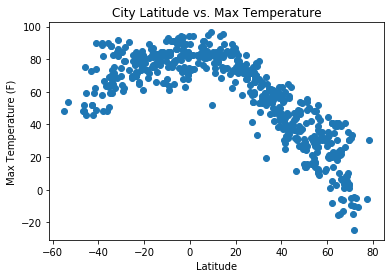

In [221]:
#Correlation between Latitude and Max Temp:
plt.scatter(df_clean.Lat,df_clean["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity')

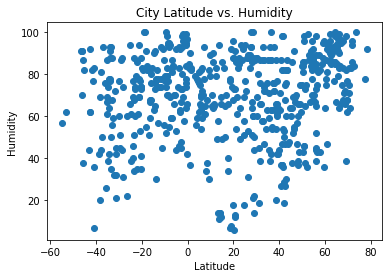

In [222]:
#Correlation between Latitude and Humidity:
plt.scatter(df_clean.Lat,df_clean.Humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

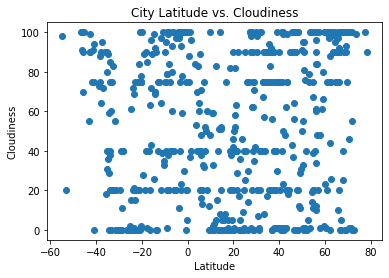

In [223]:
#Correlation between Latitude and Humidity:
plt.scatter(df_clean.Lat,df_clean.Cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

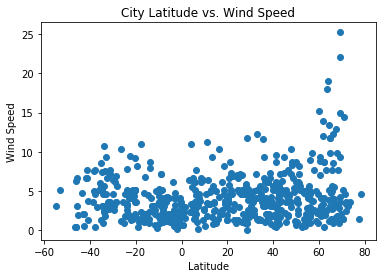

In [224]:
#Correlation between Latitude and Humidity:
plt.scatter(df_clean.Lat,df_clean["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

## Linear Regression

In [335]:
# OPTIONAL: Create a function to create Linear Regression plots
def reg(x,y):
    w_slope,w_int,w_r,w_p,w_std_err=linregress(x,y)
    w_fit=w_slope*x+w_int
    plt.scatter(x,y)
    plt.plot(x,w_fit,"r--")
    print(f"The r-squared is: {w_r}")

def line_eq(x,y):
    w_slope,w_int,w_r,w_p,w_std_err=linregress(x,y)
    line_eq="y = "+str(round(w_slope,2))+"x + "+str(round(w_int,2))
    return line_eq
    #plt.annotate(line_eq,(6,10),fontsize=10,color="red")

In [305]:
# Create Northern and Southern Hemisphere DataFrames
bins=[(-90),(-1),90]
labels=["south","north"]
df_clean["Hemisphere"]=pd.cut(df_clean.Lat,bins,labels=labels)
df_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hemisphere
0,rikitea,15.0,PF,1.584896e+09,73.0,-23.12,-134.97,78.17,1.66,south
1,ishigaki,9.0,JP,1.584896e+09,92.0,24.34,124.16,73.49,7.01,north
2,clyde river,1.0,CA,1.584896e+09,83.0,70.47,-68.59,-9.40,1.50,north
3,port elizabeth,75.0,ZA,1.584896e+09,88.0,-33.92,25.57,73.40,5.70,south
4,ushuaia,98.0,AR,1.584896e+09,57.0,-54.80,-68.30,48.20,3.10,south


In [299]:
north_df=df_clean.loc[df_clean.Hemisphere=="north"]
south_df=df_clean.loc[df_clean.Hemisphere=="south"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8957180221934719


Text(6, 10, 'y = -1.16x + 93.71')

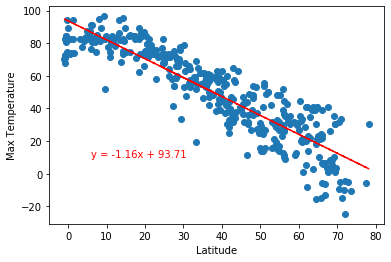

In [336]:
reg(north_df["Lat"],north_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq(north_df["Lat"],north_df["Max Temp"]),(6,10),fontsize=10,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5605350934711757


Text(-20, 50, 'y = 0.48x + 85.73')

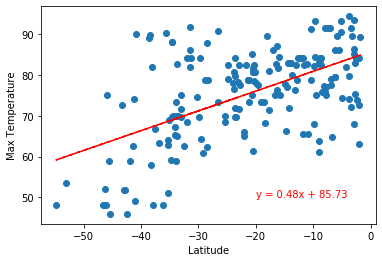

In [338]:
reg(south_df["Lat"],south_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.annotate(line_eq(south_df["Lat"],south_df["Max Temp"]),(-20,50),fontsize=10,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21879550510006715


Text(50, 20, 'y = 0.23x + 61.32')

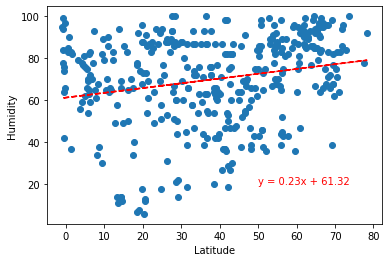

In [339]:
reg(north_df["Lat"],north_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq(north_df["Lat"],north_df["Humidity"]),(50,20),fontsize=10,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23680385385488448


Text(-20, 20, 'y = 0.35x + 76.56')

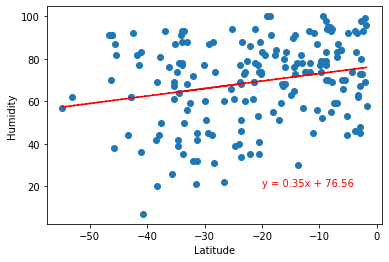

In [341]:
reg(south_df["Lat"],south_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq(south_df["Lat"],south_df["Humidity"]),(-20,20),fontsize=10,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20903658603969288


Text(80, 60, 'y = 0.38x + 37.59')

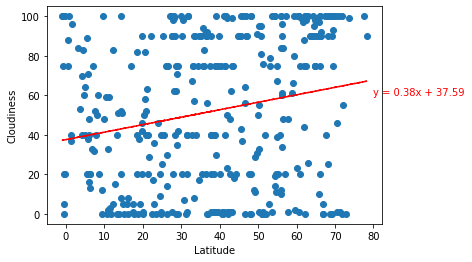

In [344]:
reg(north_df["Lat"],north_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq(north_df["Lat"],north_df["Cloudiness"]),(80,60),fontsize=10,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06796911873065142


Text(-55, 40, 'y = 0.19x + 57.9')

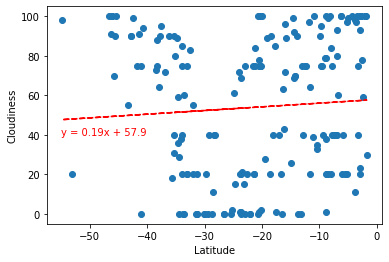

In [346]:
reg(south_df["Lat"],south_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq(south_df["Lat"],south_df["Cloudiness"]),(-55,40),fontsize=10,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.211359419518498


Text(35, 15, 'y = 0.03x + 3.07')

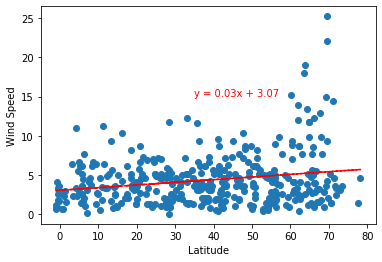

In [350]:
reg(north_df["Lat"],north_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq(north_df["Lat"],north_df["Wind Speed"]),(35,15),fontsize=10,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.26321883396804613


Text(-50, 10, 'y = -0.05x + 2.69')

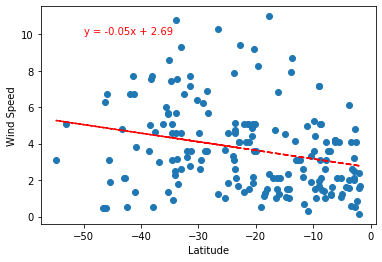

In [347]:
reg(south_df["Lat"],south_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq(south_df["Lat"],south_df["Wind Speed"]),(-50,10),fontsize=10,color="red")